<a href="https://www.kaggle.com/code/gabenazario/wine-quality-classification-rdm-forest-keras?scriptVersionId=98629174" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_Red = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv', sep=',')

In [3]:
df_Red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_White = pd.read_csv('../input/white-wine-quality/winequality-white.csv', sep=';')

In [5]:
df_White.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Check for empty or null cells.

In [6]:
df_Red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df_White.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
df_Red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df_White.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df_Red.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [11]:
df_White.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


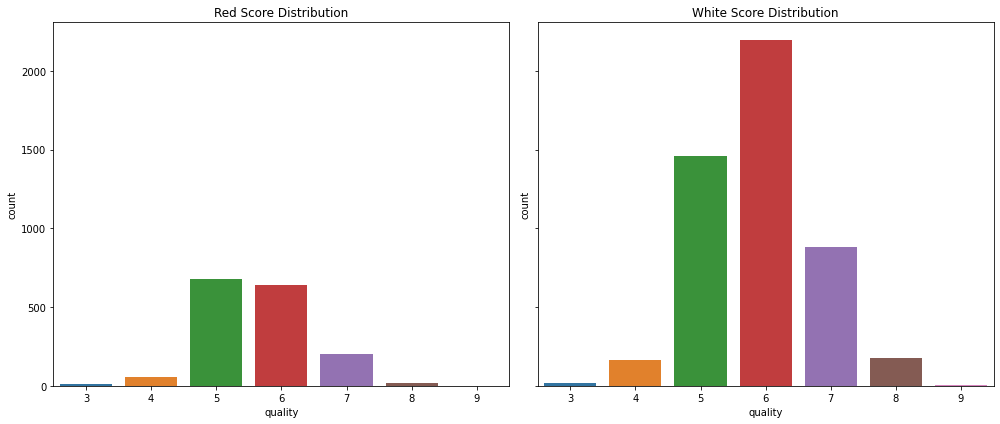

In [12]:
fig, ax = plt.subplots(1,2,
                       figsize=(14,6),
                       sharey=True,
                       sharex = True)

sns.countplot(ax=ax[0],
              x='quality',
              data=df_Red)
ax[0].set_title('Red Score Distribution')

sns.countplot(ax=ax[1], 
              x='quality',
              data=df_White)
ax[1].set_title('White Score Distribution')

plt.tight_layout()

The quality range from 3 to 9, but the data looks unbalanced.

In [13]:
df_White['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

There are more white wines scores than red wine, that would make hard to classify data if both were in the same place. Additionally, there are lots more of wines with 5 and 6 score than the others. That unbalance could lead to higher error in the other categories.

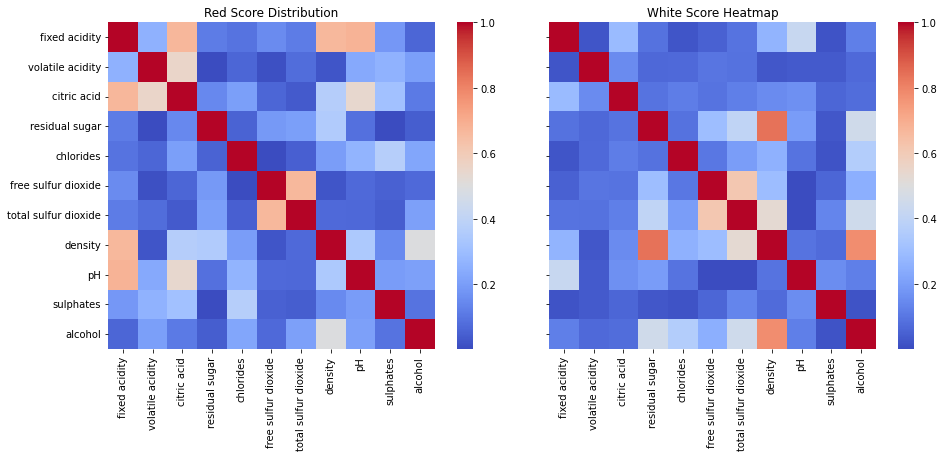

In [14]:
fig, ax = plt.subplots(1,2,
                       figsize=(14,6),
                       sharey=True
                       )

sns.heatmap(ax=ax[0],
           data=abs(df_Red.drop(['quality'],axis=1).corr()),
           cmap='coolwarm',
           square= True)
ax[0].set_title('Red Score Distribution')

sns.heatmap(ax=ax[1],
            data=abs(df_White.drop(['quality'], axis=1).corr()),
            cmap='coolwarm',
           square= True)
ax[1].set_title('White Score Heatmap')

plt.tight_layout()

There are some correlation between fixed acidity, pH, density and citric acid. 

Now check for correlation between the quality and some features.

In [15]:
df_Red.corr()['quality'].sort_values(ascending=False).iloc[1:]

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [16]:
df_White.corr()['quality'].sort_values(ascending=False).iloc[1:]

alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

Note: Removed variable response ('y') on heatmap.

There are some fairly strong correlation between features, like pH, density and fixed acidity. However, they have almost no correlation with the quality, as seen in the correlation table. These fields can be droped in case the data base had too many fields and needed to free memory to prioritize speed when training model.

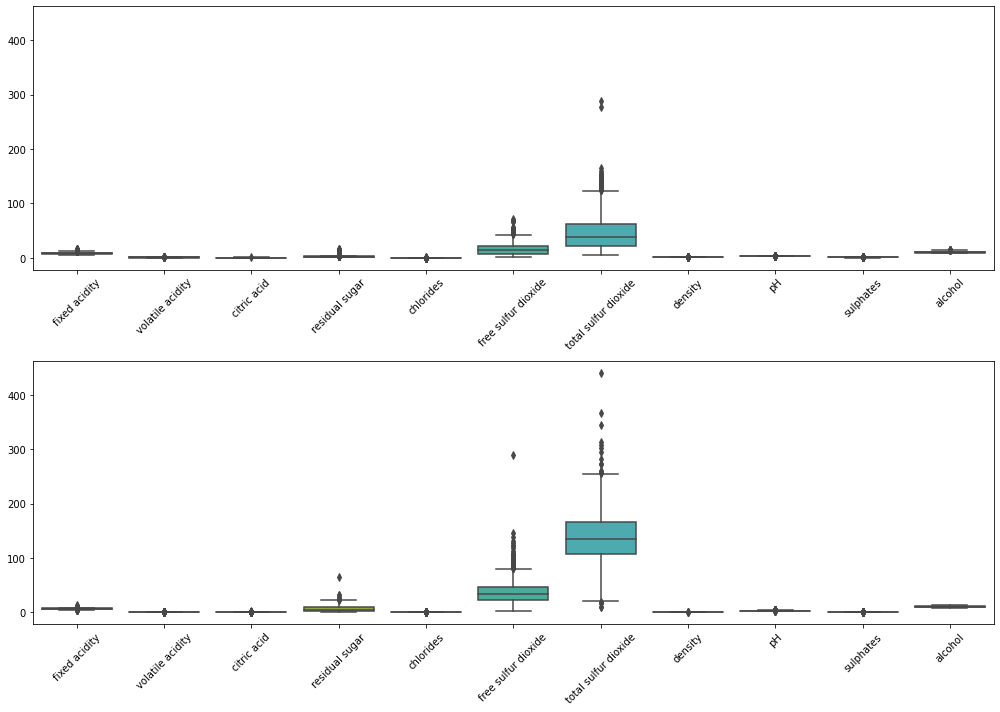

In [17]:
fig, ax = plt.subplots(2,1,
                       figsize=(14,10),
                       sharey=True
                       )

sns.boxplot(ax=ax[0],
            data=df_Red.drop(['quality'],
                             axis=1))


sns.boxplot(ax=ax[1],
            data=df_White.drop(['quality'], axis=1))

ax[0].tick_params(axis='x', labelrotation = 45)
ax[1].tick_params(axis='x', labelrotation = 45)

plt.tight_layout()

There are some outline values, these rows will be dropped to help improving the model, only for the X's.

In [18]:
from scipy import stats

In [19]:
(abs(stats.zscore(df_Red)) < 3).all(axis=1).value_counts()

True     1451
False     148
dtype: int64

In [20]:
df_Red = df_Red[(abs(stats.zscore(df_Red)) < 3).all(axis=1)]

In [21]:
df_Red.shape

(1451, 12)

In [22]:
df_White = df_White[(abs(stats.zscore(df_White)) < 3).all(axis=1)]

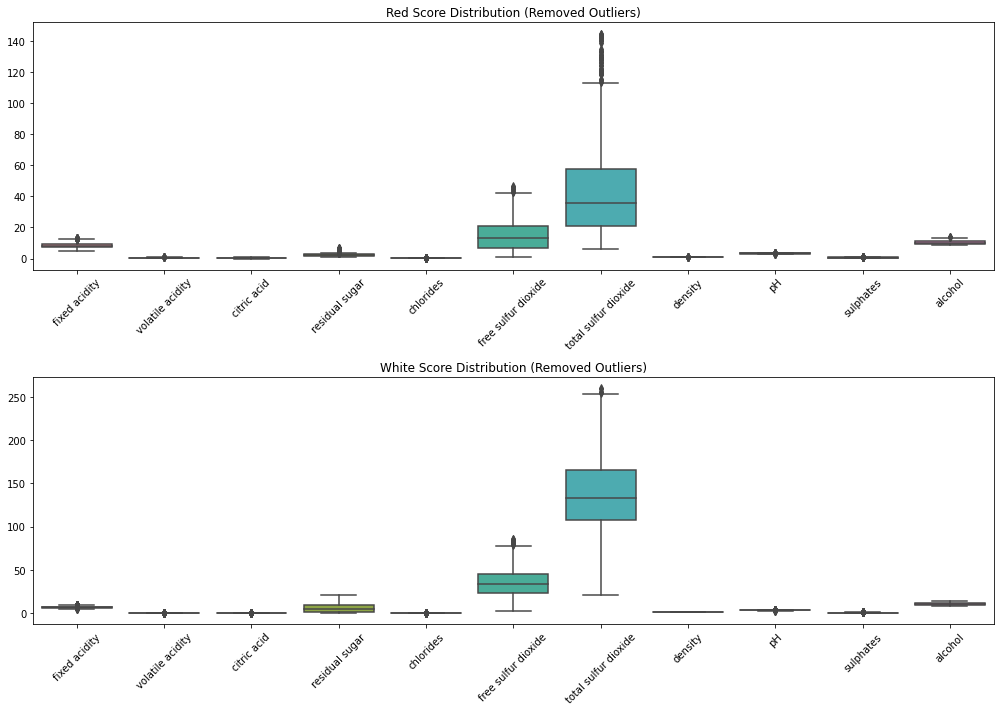

In [23]:
fig, ax = plt.subplots(2,1,
                       figsize=(14,10)
                       )

sns.boxplot(ax=ax[0],
            data=df_Red.drop(['quality'],
                             axis=1))


sns.boxplot(ax=ax[1],
            data=df_White.drop(['quality'], axis=1))

ax[0].tick_params(axis='x', labelrotation = 45)
ax[0].set_title('Red Score Distribution (Removed Outliers)')
ax[1].tick_params(axis='x', labelrotation = 45)
ax[1].set_title('White Score Distribution (Removed Outliers)')

plt.tight_layout()

Good to go.

0.8160833161341197


<AxesSubplot:xlabel='density', ylabel='alcohol'>

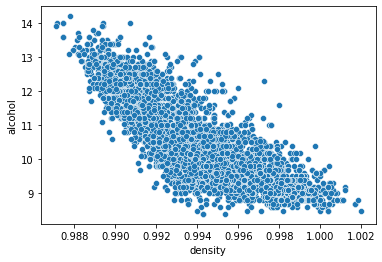

In [24]:
corr = abs(df_White['density'].corr(df_White['alcohol']))

print(corr)
sns.scatterplot(x='density', y='alcohol', data=df_White)

0.8402264134341874


<AxesSubplot:xlabel='density', ylabel='residual sugar'>

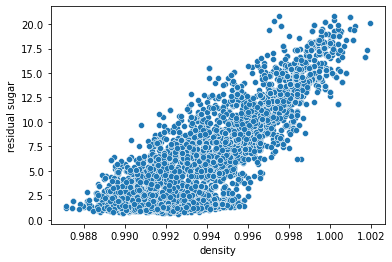

In [25]:
corr = abs(df_White['density'].corr(df_White['residual sugar']))

print(corr)
sns.scatterplot(x='density', y='residual sugar', data=df_White)

Before any data modeling is done we need to scale the data.

# Classification Comparison Methods


## Random Forest

### White

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(n_estimators=400)

In [28]:
X = df_White.drop(['quality'], axis=1).values
y = df_White['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
rfc.fit(X_train, y_train) #Random forest does not need scaling

RandomForestClassifier(n_estimators=400)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
pred_White = rfc.predict(X_test)

In [32]:
print(confusion_matrix(y_test, pred_White))
print('\n')
print(classification_report(y_test, pred_White))

[[  8  11  13   0   0]
 [  1 244 127   2   0]
 [  1 103 485  33   0]
 [  0   2 123 141   1]
 [  0   0  23  12  17]]


              precision    recall  f1-score   support

           4       0.80      0.25      0.38        32
           5       0.68      0.65      0.66       374
           6       0.63      0.78      0.70       622
           7       0.75      0.53      0.62       267
           8       0.94      0.33      0.49        52

    accuracy                           0.66      1347
   macro avg       0.76      0.51      0.57      1347
weighted avg       0.68      0.66      0.66      1347



### Red

In [33]:
X = df_Red.drop(['quality'], axis=1).values
y = df_Red['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [34]:
rfc.fit(X_train, y_train) #Random forest does not need scaling

RandomForestClassifier(n_estimators=400)

In [35]:
pred_Red = rfc.predict(X_test)

In [36]:
print(confusion_matrix(y_test, pred_Red))
print('\n')
print(classification_report(y_test, pred_Red))

[[  0  11   3   1   0]
 [  0 130  47   2   0]
 [  0  44 129   6   0]
 [  0   4  22  32   0]
 [  0   0   2   3   0]]


              precision    recall  f1-score   support

           4       0.00      0.00      0.00        15
           5       0.69      0.73      0.71       179
           6       0.64      0.72      0.68       179
           7       0.73      0.55      0.63        58
           8       0.00      0.00      0.00         5

    accuracy                           0.67       436
   macro avg       0.41      0.40      0.40       436
weighted avg       0.64      0.67      0.65       436



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Tensorflow using Keras with Droupout
### White

I think that to use classification I'll need to create dummy variables to the response ranging from 3 to 9.

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
scaler = MinMaxScaler()

Get the number of unique responses where the program adjests in case of new data.

In [39]:
ys_w = df_White['quality'].nunique()
ys_w

5

Get the dummy variables to use on the ML.
Do not drop the dummy so you can properly get the proporsions.

In [40]:
dummy_White = pd.get_dummies(df_White['quality'], drop_first=False)

In [41]:
df_White.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [42]:
df_White = pd.concat([df_White, dummy_White], axis=1)

In [43]:
df_White.drop(['quality'], axis=1, inplace=True)

In [44]:
X = df_White.drop(df_White.iloc[:,-ys_w:], axis=1).values
y = df_White.iloc[:,-ys_w:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
X_train = scaler.fit_transform(X_train)

In [46]:
np.round(X_train.shape[1]/2).astype('int32')

6

In [47]:
X_test = scaler.transform(X_test)

In [48]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [49]:
model = Sequential()

model.add(Dense(units=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=np.round(X_train.shape[1]/2).astype('int32'), activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

2022-06-17 16:09:36.242664: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [50]:
model.fit(x=X_train, 
          y=y_train,
          epochs=400,
          validation_data=(X_test, y_test),
          batch_size = 256,
          callbacks=[early_stop]
          )

2022-06-17 16:09:36.450098: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/400
13/13 [==============================] - 1s 22ms/step - loss: 1.4201 - accuracy: 0.4299 - val_loss: 1.3568 - val_accuracy: 0.4595
Epoch 2/400
13/13 [==============================] - 0s 5ms/step - loss: 1.3713 - accuracy: 0.4382 - val_loss: 1.3132 - val_accuracy: 0.4618
Epoch 3/400
13/13 [==============================] - 0s 5ms/step - loss: 1.3459 - accuracy: 0.4414 - val_loss: 1.2837 - val_accuracy: 0.4618
Epoch 4/400
13/13 [==============================] - 0s 5ms/step - loss: 1.3312 - accuracy: 0.4395 - val_loss: 1.2606 - val_accuracy: 0.4640
Epoch 5/400
13/13 [==============================] - 0s 6ms/step - loss: 1.3033 - accuracy: 0.4449 - val_loss: 1.2408 - val_accuracy: 0.4618
Epoch 6/400
13/13 [==============================] - 0s 5ms/step - loss: 1.2912 - accuracy: 0.4529 - val_loss: 1.2256 - val_accuracy: 0.4714
Epoch 7/400
13/13 [==============================] - 0s 6ms/step - loss: 1.2737 - accuracy: 0.4481 - val_loss: 1.2102 - val_accuracy: 0.4751
Epoch 8/400


In [51]:
model_loss_do = pd.DataFrame(model.history.history)

<AxesSubplot:>

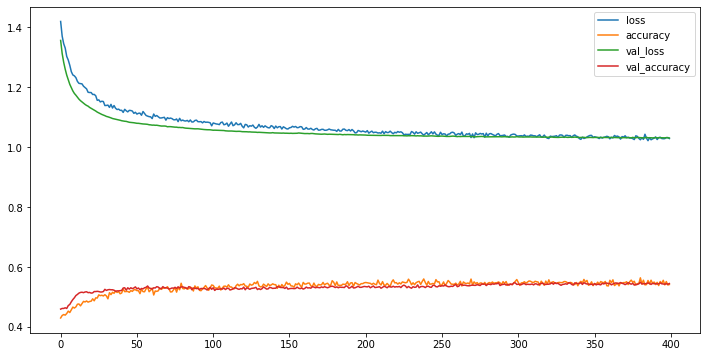

In [52]:
model_loss_do.plot(figsize=(12,6))

Not great, accuracy of 55%. That's is not a good one and lower than the random forest.

In [53]:
pred_DO_White = (model.predict(X_test))

In [54]:
pred_DO_White

array([[0.00502789, 0.043114  , 0.3916223 , 0.4456231 , 0.11461267],
       [0.0030202 , 0.05131933, 0.42833877, 0.4161479 , 0.10117378],
       [0.00389517, 0.05635129, 0.43862075, 0.40716252, 0.09397021],
       ...,
       [0.05269385, 0.29150006, 0.5210842 , 0.12040982, 0.01431211],
       [0.0077809 , 0.17608844, 0.5494091 , 0.22853075, 0.03819077],
       [0.00182086, 0.02369203, 0.36537978, 0.49318886, 0.11591852]],
      dtype=float32)

In [55]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [56]:
score = model.evaluate(X_train, y_train, verbose=0)

In [57]:
score2 = model.evaluate(X_test, y_test, verbose=0)

In [58]:
print('{} {}'.format(score[1], 1 - score[1]))

0.5668789744377136 0.4331210255622864


In [59]:
print('{} {}'.format(score2[1], 1 - score2[1]))

0.5449146032333374 0.4550853967666626


## Red

In [60]:
dummy_Red = pd.get_dummies(df_Red['quality'], drop_first=False)

df_Red = pd.concat([df_Red, dummy_Red], axis=1)

df_Red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,4,5,6,7,8
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1,0,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,1,0,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,1,0,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0,1,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1,0,0,0


In [61]:
ys_r = df_Red['quality'].nunique()
ys_r

5

In [62]:
df_Red.drop(['quality'], axis=1, inplace=True)

df_Red.drop(df_Red.iloc[:,-ys_r:], axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [63]:
X = df_Red.drop(df_Red.iloc[:,-ys_r:], axis=1).values
y = df_Red.iloc[:,-ys_r:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = scaler.fit_transform(X_train)

In [64]:
np.round(X_train.shape[1]/2).astype('int32')

6

In [65]:
X_test = scaler.transform(X_test)

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

I decided to automate the number of neurons for the hidden layers and output layer. 

In [66]:
model = Sequential()

model.add(Dense(units=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=np.round(X_train.shape[1]/2).astype('int32'), activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [67]:
model.fit(x=X_train, 
          y=y_train,
          epochs=400,
          validation_data=(X_test, y_test),
          batch_size = 256,
          callbacks=[early_stop]
          )

Epoch 1/400
4/4 [==============================] - 1s 67ms/step - loss: 1.6371 - accuracy: 0.1537 - val_loss: 1.6276 - val_accuracy: 0.1560
Epoch 2/400
4/4 [==============================] - 0s 14ms/step - loss: 1.6195 - accuracy: 0.1793 - val_loss: 1.6120 - val_accuracy: 0.2087
Epoch 3/400
4/4 [==============================] - 0s 15ms/step - loss: 1.6031 - accuracy: 0.2315 - val_loss: 1.5971 - val_accuracy: 0.2615
Epoch 4/400
4/4 [==============================] - 0s 15ms/step - loss: 1.5887 - accuracy: 0.2650 - val_loss: 1.5828 - val_accuracy: 0.2936
Epoch 5/400
4/4 [==============================] - 0s 15ms/step - loss: 1.5730 - accuracy: 0.2857 - val_loss: 1.5691 - val_accuracy: 0.3303
Epoch 6/400
4/4 [==============================] - 0s 16ms/step - loss: 1.5631 - accuracy: 0.3212 - val_loss: 1.5555 - val_accuracy: 0.3578
Epoch 7/400
4/4 [==============================] - 0s 15ms/step - loss: 1.5486 - accuracy: 0.3271 - val_loss: 1.5423 - val_accuracy: 0.3945
Epoch 8/400
4/4 [===

Same as before. Are there ways to improve the accuracy?

In [68]:
model_loss_do = pd.DataFrame(model.history.history)

<AxesSubplot:>

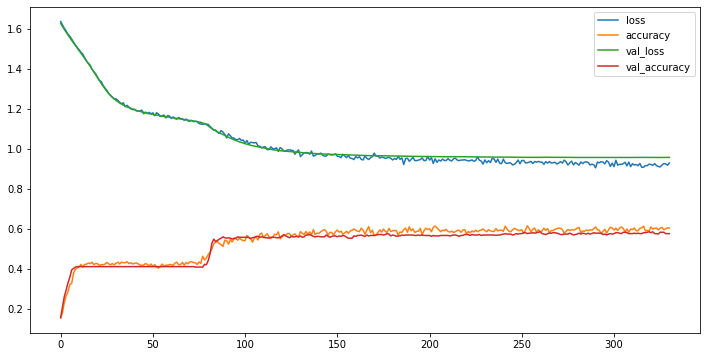

In [69]:
model_loss_do.plot(figsize=(12,6))

In [70]:
pred_DO_Red = (model.predict(X_test))

pred_DO_Red

array([[0.00561281, 0.05884196, 0.35180655, 0.5328348 , 0.05090389],
       [0.04654388, 0.62887245, 0.31341666, 0.00892812, 0.00223889],
       [0.04046767, 0.67689514, 0.27466723, 0.00668819, 0.00128175],
       ...,
       [0.04063595, 0.32774872, 0.56751305, 0.0546612 , 0.00944117],
       [0.03952938, 0.6382101 , 0.31187773, 0.00886396, 0.0015188 ],
       [0.00293048, 0.02303971, 0.3346465 , 0.56909215, 0.07029115]],
      dtype=float32)

In [71]:
score = model.evaluate(X_train, y_train, verbose=0)

score2 = model.evaluate(X_test, y_test, verbose=0)

print('{} {}'.format(score[1], 1 - score[1]))

print('{} {}'.format(score2[1], 1 - score2[1]))

0.6374384164810181 0.36256158351898193
0.5756880640983582 0.42431193590164185


### Bad results using Keras compared to Random Forest, which was also low.
 
### How can I inprove both models? Feature Engineering?